# Relatório de Análise VII

## Identificando e Removendo Outliers

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [5]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

<AxesSubplot:>

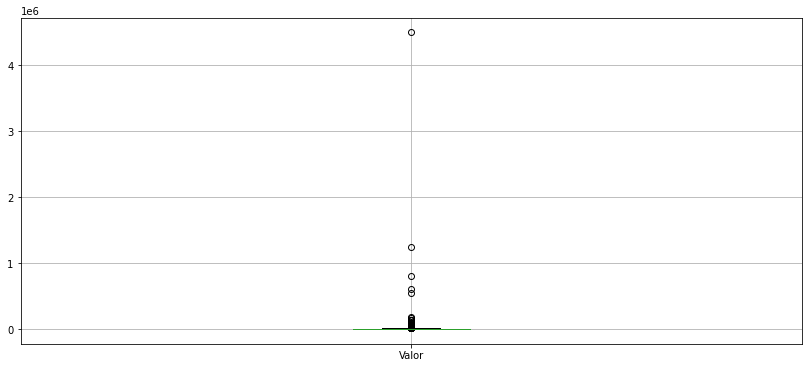

In [7]:
dados.boxplot(['Valor'])

In [10]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Tipo Agregado
7658,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,Apartamento
10679,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,Casa
12709,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,Apartamento
13901,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,Apartamento
15578,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,Apartamento


In [11]:
valor = dados['Valor']

In [20]:
# Quartis
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [21]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

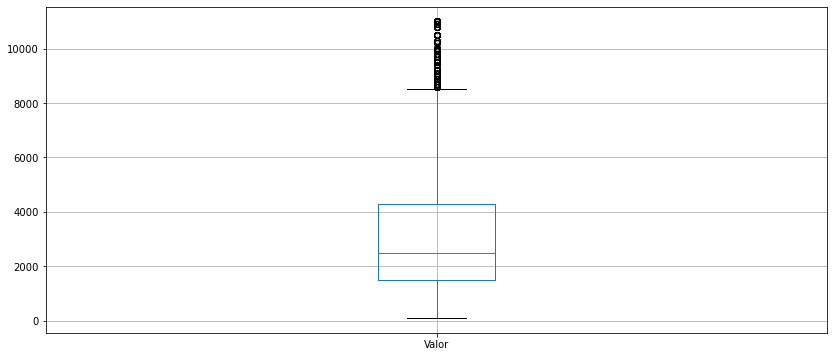

In [22]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

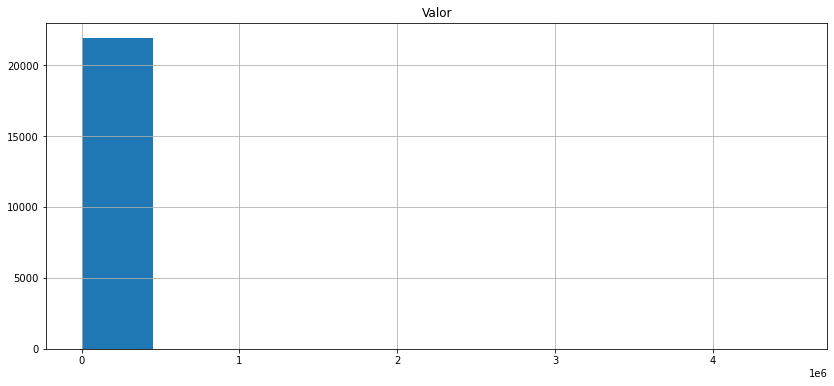

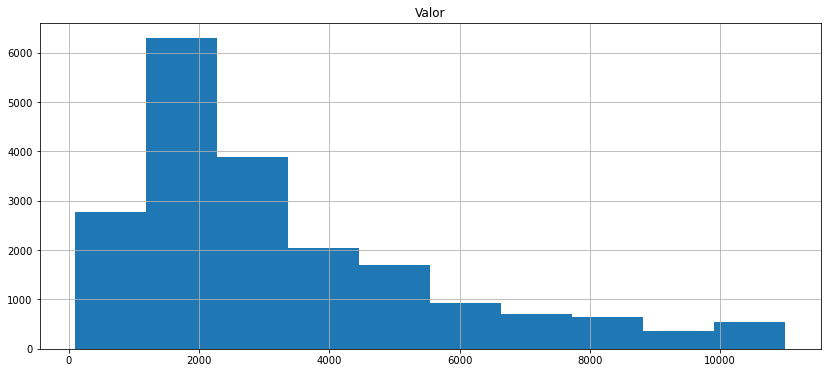

In [24]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

# Identificando e Removento Outliers (Continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

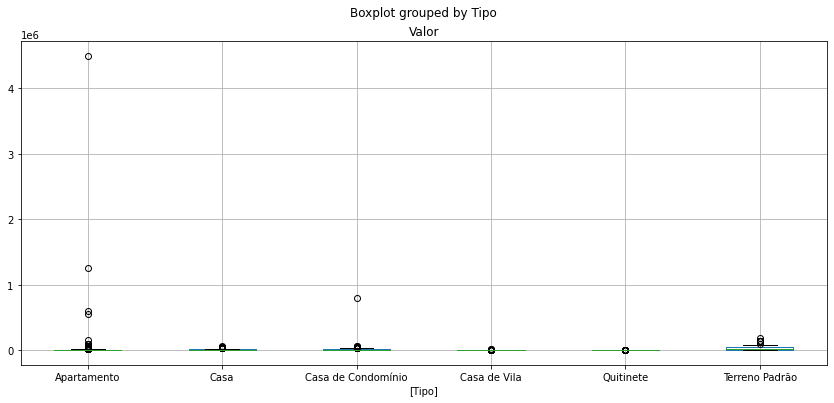

In [26]:
dados.boxplot(['Valor'], by=['Tipo'])

In [31]:
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [48]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, ...], 'Casa': [1, 22, 54, 57, 96, 100, 145, 161, 181, 239, 251, 254, 265, 287, 311, 317, 335, 340, 358, 380, 387, 401, 426, 436, 476, 477, 483, 513, 544, 545, 569, 573, 574, 620, 623, 632, 637, 638, 662, 678, 702, 723, 726, 762, 773, 782, 858, 875, 940, 985, 1033, 1040, 1122, 1127, 1129, 1161, 1183, 1254, 1261, 1321, 1340, 1356, 1377, 1418, 1432, 1436, 1446, 1451, 1478, 1481, 1494, 1592, 1610, 1662, 1668, 1672, 1677, 1690, 1715, 1723, 1768, 1816, 1842, 1882, 1912, 1940, 1949, 1968, 2027, 2047, 2064, 2083, 2109, 2115, 2116, 2141, 2178, 2209, 2212, 2219, ...], 'Casa 

In [32]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [33]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Terreno Padrão        8000.0
Name: Valor, dtype: float64

In [34]:
 Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Terreno Padrão        40000.0
Name: Valor, dtype: float64

In [35]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Terreno Padrão        32000.0
Name: Valor, dtype: float64

In [36]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Terreno Padrão       -40000.0
Name: Valor, dtype: float64

In [37]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Terreno Padrão        88000.0
Name: Valor, dtype: float64

In [39]:
limite_superior['Casa']

22850.0

In [43]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

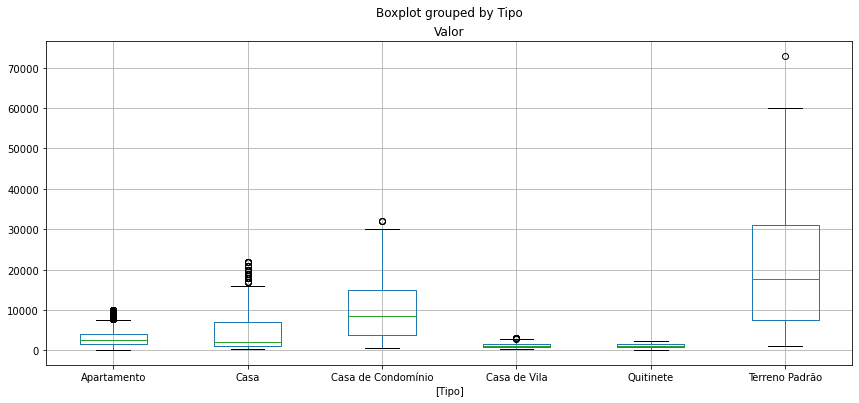

In [49]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [50]:
dados_new.to_csv('Dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)